In [207]:
# Import libraries

# Basic Operation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Save Model
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")

Context:
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

For more information regarding this dataset, please visit: https://www.kaggle.com/blastchar/telco-customer-churn

Key Points: On this dataset, we want to focus on Recall (reducing FN value), we want to put optimum effort to customers who are actually going to churn but our model predicts it as a negative.

Categorical Feature:
* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Numerical Feature:
* Tenure : Number of months the customer has stayed with the company
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer

Target Feature: 
* Churn : Whether the customer churned or not (Yes or No)

# Load Dataset

In [208]:
df = pd.read_csv('Telco Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [209]:
df.shape

(7043, 21)

In [210]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [211]:
# Checking the missing data
df.isna().sum()
# There is 11 missing data

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [212]:
df.dropna(inplace=True)

In [213]:
# Rechecking the missing data
df.isna().sum()
# There is no missing data anymore

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [214]:
# Renaming/Capitalizing 3 column names for consistency
df = df.rename(columns={'customerID' : 'CustomerID', 'gender' : 'Gender', 'tenure' : 'Tenure'})

In [215]:
# Rechecking all of the column names
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [216]:
df['Churn'].value_counts()/df.shape[0]
# 73,4% No and 26,5% Yes
# This dataset is considered imbalanced

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

* https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=Imbalanced%20Data%20bookmark_border,smaller%20proportion%20are%20minority%20classes.
* https://zyxo.wordpress.com/2008/12/30/oversampling-or-undersampling/

# Preprocessing

In [217]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [218]:
# Make new feature that changes the value of Yes to 1 an No to 0 from Churn feature
df['Label'] = np.where(df['Churn'] == 'Yes',1,0)
df['Label']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Label, Length: 7032, dtype: int32

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   Tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Preprocessing Step by step:
* Dropping 4 features:
>* CustomerID: This feature has no meaning nor relevancy for ML models.
>* PhoneService:  This feature is already represented by MultipleLines feature.
>* TotalCharges: This feature is already represented by MonthlyCharges and Tenure feature.
>* Churn: This feature is already represented by Label feature
* Applying One Hot Encoder to 14 features: 
>* Gender
>* Partner
>* Dependents
>* MultipleLines
>* InternetService
>* OnlineSecurity
>* OnlineBackup
>* DeviceProtection
>* TechSupport
>* StreamingTV
>* StreamingMovies
>* Contract
>* PaperlessBilling
>* PaymentMethod 
* Applying Standard Scaler to 2 features:
>* Tenure 
>* MonthlyCharges
* Passthrough 1 feature:
>* SeniorCitizen
* Target feature:
>* Label

## Transformer

I make 2 transformers; the first one is applying StandardScaler to MonthlyCharges an Tenure feature, and the second one is without scaling treatment to those features. I will apply these transformers and see which one has the better performance.

In [220]:
transformer_scaling = ColumnTransformer([
                                ('one hot encoder',OneHotEncoder(drop = 'first'),['Gender','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']),
                                ('scaling',StandardScaler(),['MonthlyCharges','Tenure'])
                                ], remainder = 'passthrough')

transformer_no_scaling = ColumnTransformer([
                                ('one hot encoder',OneHotEncoder(drop = 'first'),['Gender','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']),
                                ], remainder = 'passthrough')

## Data Splitting

In [259]:
X = df.drop(columns=['CustomerID','PhoneService','TotalCharges','Churn','Label'])
y = df[['Label']]

In [260]:
X_train,X_test,y_train,y_test= train_test_split(X,y, stratify = y, test_size = 0.3, random_state=42)

## Model Selection

I decided to try 3 models (Logistic Regression, K Neighbors Classifier, and Random Forest Classifier) to find the best model for this dataset. Also I apply SMOTE balancing treatment because this dataset is considered imbalanced (73,4% No and 26,5% Yes)

In [223]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = RandomForestClassifier() # RF
skfold = StratifiedKFold(n_splits = 5)
smote = SMOTE()

models = [model_1, model_2, model_3]
recall_score_mean = []
recall_score_std = []

for i in models:
    Z = Pipeline([('transformer',transformer_scaling),('balancing',smote),('model',i)])
    recall_score_mean.append(cross_val_score(Z, X_train, y_train, cv=skfold, scoring='recall').mean())
    recall_score_std.append(cross_val_score(Z, X_train, y_train, cv=skfold, scoring='recall').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest']

pd.DataFrame({'Method': title,'Recall Score Mean': recall_score_mean, 'Recall Score STD': recall_score_std})

,Method,Recall Score Mean,Recall Score STD
0,Logistic Regression,0.787438,0.025359
1,K Nearest Neighbors,0.736998,0.021644
2,Random Forest,0.552754,0.016628


In [224]:
model_1 = LogisticRegression() # logreg
model_2 = KNeighborsClassifier() # KNN
model_3 = RandomForestClassifier() # RF
skfold = StratifiedKFold(n_splits = 5)
smote = SMOTE()

models = [model_1, model_2, model_3]
recall_score_mean = []
recall_score_std = []

for i in models:
    Z = Pipeline([('transformer',transformer_no_scaling),('balancing',smote),('model',i)])
    recall_score_mean.append(cross_val_score(Z, X_train, y_train, cv=skfold, scoring='recall').mean())
    recall_score_std.append(cross_val_score(Z, X_train, y_train, cv=skfold, scoring='recall').std())

title = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest']

pd.DataFrame({'Method': title,'Recall Score Mean': recall_score_mean, 'Recall Score STD': recall_score_std})

,Method,Recall Score Mean,Recall Score STD
0,Logistic Regression,0.793560,0.026006
1,K Nearest Neighbors,0.742365,0.027958
2,Random Forest,0.509169,0.008481


Based on the evaluation score, I decided to use Logistic Regression model without scaling as the best model to use

## Model Benchmark

In [225]:
model = LogisticRegression()
smote = SMOTE()

estimator = Pipeline([('transformer',transformer_no_scaling),('balancing',smote),('model',model)])
estimator.fit(X_train,y_train)

y_pred1 = estimator.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.77      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.74      0.75      2110



In [226]:
recall_score(y_test, y_pred1)

0.7736185383244206

## Hyperparameter Tuning

In [227]:
# make the algorithm chains
model =  LogisticRegression()
smote = SMOTE()

estimator = Pipeline([('preprocess', transformer_no_scaling),('balancing',smote),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'clf__solver': ['newton-cg','liblinear'],
    'clf__max_iter': [100, 200, 300],
    'clf__C': [1000, 100, 10, 0.1, 0.01, 0.001]
    }

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [228]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines',
                                                                          'InternetService

In [229]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 10, 'clf__max_iter': 200, 'clf__solver': 'liblinear'}
0.6343396242590222


In [230]:
grid_search.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBill

In [231]:
y_pred2 = grid_search.best_estimator_.predict(X_test)

In [232]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1549
           1       0.50      0.77      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.74      0.75      2110



In [233]:
recall_score(y_test, y_pred2)

0.7700534759358288

In [246]:
print(f'the Recall score of Logistic Regression without Tuning is {recall_score(y_test, y_pred1)}, and the Recall score of Logistic Regression after Hyperparameter Tuning is {recall_score(y_test, y_pred2)}. Based on these scores, the best model for this dataset is Logistic Regression without Tuning.')

the Recall score of Logistic Regression without Tuning is 0.7736185383244206, and the Recall score of Logistic Regression after Hyperparameter Tuning is 0.7700534759358288. Based on these scores, the best model for this dataset is Logistic Regression without Tuning


In [ ]:
model = LogisticRegression()
smote = SMOTE()

estimator = Pipeline([('transformer',transformer_no_scaling),('balancing',smote),('model',model)])
estimator.fit(X_train,y_train)

y_pred1 = estimator.predict(X_test)
print(classification_report(y_test,y_pred1))

## Confusion Matrix of Best Model

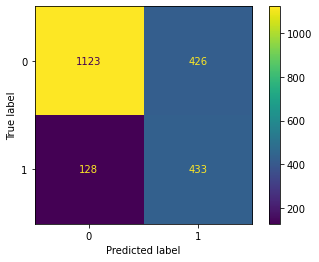

In [248]:
model = LogisticRegression()
smote = SMOTE()
estimator = Pipeline([('transformer',transformer_no_scaling),('balancing',smote),('model',model)])

best_model = estimator.fit(X_train, y_train)
plot_confusion_matrix(best_model, X_test, y_test)

In [249]:
print(f' Our Machine Learning model has sucessfully retained {round(100 - (128/(1123+426+433)*100),2)}% of our customer base!')

 Our Machine Learning model has sucessfully retained 93.54% of our customer base!


In [265]:
y_train['Label'].value_counts()/y_train.shape[0]

0    0.734254
1    0.265746
Name: Label, dtype: float64

In [267]:
y_test['Label'].value_counts()/y_test.shape[0]

0    0.734123
1    0.265877
Name: Label, dtype: float64

# Conclusion

* The best Machine Learning model for this dataset is Logistic Regression without Hyperparameter Tuning, with Recall score of 0.7736185383244206
* After Hyperparameter Tuning, the Recall score is slightly reduced to 0.7700534759358288
* Our Machine Learning model has sucessfully retained 93.54% of our cutomer base!

# Save Model

In [251]:
import pickle 

estimator.fit(X_train,y_train)

pickle.dump(estimator,open('model.sav','wb'))

# Load model

In [252]:
# test model
filename = 'model.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [253]:
loaded_model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 1])

______

# Helpful Links

* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=turn%20to%20StandardScaler.-,StandardScaler,values%20by%20the%20standard%20deviation.&text=StandardScaler%20results%20in%20a%20distribution%20with%20a%20standard%20deviation%20equal%20to%201.
* https://www.youtube.com/watch?v=nmBqnKSSKfM&ab_channel=KrishNaik

________